In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load your dataset (replace the path if necessary)
df = pd.read_csv('large_product_sales_data.csv')

In [4]:
# Convert Date to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [5]:

# 1. Extract Job Requests & Interactions (Analyzing interactions)
def interaction_summary(df):
    interaction_data = df.groupby('InteractionType').agg(
        total_interactions=('InteractionType', 'count'),
        conversion_rate=('Converted', 'mean')
    ).reset_index()
    return interaction_data

interaction_data = interaction_summary(df)
print("Interaction Summary:")
print(interaction_data)

Interaction Summary:
  InteractionType  total_interactions  conversion_rate
0     Add to Cart                 255              0.0
1           Click                 250              0.0
2        Purchase                 254              1.0
3            View                 241              0.0


In [6]:
# 2. Generate Statistical Summaries of the Data
def data_summary(df):
    return df.describe()

summary = data_summary(df)
print("\nStatistical Summary:")
print(summary)


Statistical Summary:
                                Date    Converted  QuantitySold  Anomaly
count                           1000  1000.000000    1000.00000   1000.0
mean   2025-01-04 16:39:21.599999744     0.254000       0.80200      0.0
min              2024-10-06 00:00:00     0.000000       0.00000      0.0
25%              2024-11-19 18:00:00     0.000000       0.00000      0.0
50%              2025-01-08 00:00:00     0.000000       0.00000      0.0
75%              2025-02-18 00:00:00     1.000000       1.00000      0.0
max              2025-04-06 00:00:00     1.000000       5.00000      0.0
std                              NaN     0.435515       1.54958      0.0


In [10]:
# 3. Predictive Analytics (Forecasting Sales)
def predict_sales(df):
    # Prepare the data: Predict QuantitySold based on ProductType and MarketingStrategy
    df['ProductType'] = pd.Categorical(df['ProductType']).codes
    df['MarketingStrategy'] = pd.Categorical(df['MarketingStrategy']).codes
    X = df[['ProductType', 'MarketingStrategy']]  # Features
    y = df['QuantitySold']  # Target

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a simple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

        # Forecast future sales (predict on test set)
    y_pred = model.predict(X_test)

    return model, X_test, y_test, y_pred

In [11]:
# Train the model and forecast sales
model, X_test, y_test, y_pred = predict_sales(df)
print("\nSales Forecasting Results:")
for i in range(len(y_pred)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")


Sales Forecasting Results:
Predicted: 0.8740731535977577, Actual: 1
Predicted: 0.8750411613786505, Actual: 1
Predicted: 0.804870353483808, Actual: 2
Predicted: 0.8068063690455937, Actual: 0
Predicted: 0.7702689534268331, Actual: 0
Predicted: 0.8039023457029152, Actual: 0
Predicted: 0.872137138035972, Actual: 2
Predicted: 0.7741409845504045, Actual: 4
Predicted: 0.7405075922743224, Actual: 0
Predicted: 0.8039023457029152, Actual: 3
Predicted: 0.8068063690455937, Actual: 0
Predicted: 0.771236961207726, Actual: 0
Predicted: 0.8058383612647009, Actual: 0
Predicted: 0.8750411613786505, Actual: 0
Predicted: 0.7405075922743224, Actual: 0
Predicted: 0.771236961207726, Actual: 0
Predicted: 0.7366355611507511, Actual: 0
Predicted: 0.8068063690455937, Actual: 1
Predicted: 0.8404397613216756, Actual: 3
Predicted: 0.8414077691025685, Actual: 0
Predicted: 0.872137138035972, Actual: 0
Predicted: 0.7702689534268331, Actual: 0
Predicted: 0.7405075922743224, Actual: 0
Predicted: 0.7731729767695116, Act

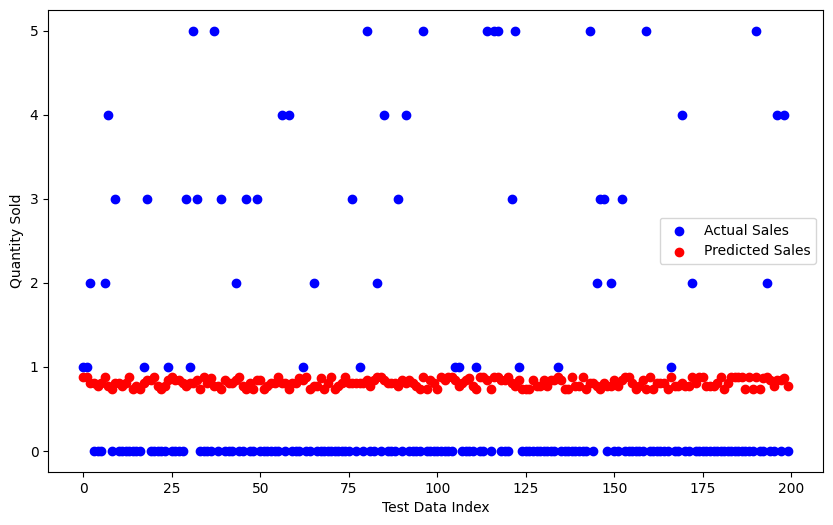

In [12]:
# Plot predicted vs actual sales
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Sales')
plt.xlabel('Test Data Index')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

In [13]:
# 4. Anomaly Detection
def detect_anomalies(df):
    # Use Isolation Forest for anomaly detection
    model = IsolationForest(contamination=0.1)  # Contamination is the proportion of anomalies
    df['Anomaly'] = model.fit_predict(df[['QuantitySold']])

    # Convert the anomaly output (-1 for anomaly, 1 for normal)
    df['Anomaly'] = df['Anomaly'].map({-1: True, 1: False})

    return df


In [14]:
# Detect anomalies in the dataset
df_with_anomalies = detect_anomalies(df)
print("\nDataset with Anomalies Detected:")
print(df_with_anomalies)


Dataset with Anomalies Detected:
          Date  ProductType  MarketingStrategy InteractionType  Converted  \
0   2025-03-25            1                  1            View          0   
1   2025-02-16            4                  1        Purchase          1   
2   2025-03-13            4                  1            View          0   
3   2024-12-12            3                  2           Click          0   
4   2025-02-27            1                  2            View          0   
..         ...          ...                ...             ...        ...   
995 2024-11-24            3                  3     Add to Cart          0   
996 2025-04-02            0                  0            View          0   
997 2024-10-07            1                  3           Click          0   
998 2024-10-08            2                  3           Click          0   
999 2024-10-28            3                  1            View          0   

     QuantitySold  Anomaly  
0           

In [15]:
# Show the rows with anomalies
anomalies = df_with_anomalies[df_with_anomalies['Anomaly'] == True]
print("\nAnomalies:")
print(anomalies)


Anomalies:
          Date  ProductType  MarketingStrategy InteractionType  Converted  \
1   2025-02-16            4                  1        Purchase          1   
5   2025-03-24            4                  4        Purchase          1   
9   2024-10-15            3                  4        Purchase          1   
40  2025-02-28            4                  2        Purchase          1   
65  2025-03-31            4                  2        Purchase          1   
..         ...          ...                ...             ...        ...   
918 2025-03-30            0                  1        Purchase          1   
935 2025-01-19            1                  1        Purchase          1   
948 2025-02-05            4                  2        Purchase          1   
951 2025-03-13            0                  1        Purchase          1   
978 2024-11-02            4                  0        Purchase          1   

     QuantitySold  Anomaly  
1               5     True  
5    